# Obdelava podatkov 2. del

In [1]:
import datetime
import csv
import pandas as pd
import numpy as np

In [3]:
column_names = [ 'Type A', 'Measure A', 'Units A',
                 'Type B', 'Measure B', 'Units B',
                 'Type C', 'Measure C', 'Units C', 
                 'Datetime']

In [7]:
#najprej uvozimo csv v pandas
df_redundant = pd.read_csv('data/DATA_rpi_data_long_R.csv', names = column_names)
df_redundant.head(5)

,Type A,Measure A,Units A,Type B,Measure B,Units B,Type C,Measure C,Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


In [ ]:
#numpy, matplotlib, pandas, web scraping
#uvoz in čiščenje podatkov in nato analiza, izris grafa
#online notebooks: kaggle

**Urejanje prikaza podatkov**



In [69]:
df_compact  = df_redundant.copy()

In [10]:
map_dict = {'Measure A':'Ping (ms)', 'Measure B': 'Download (Mbit/s)', 'Measure C': 'Upload (Mbit/s)'}

In [70]:
#preimenuj vstolpce na mestu
df_compact.rename(columns = map_dict, inplace = True)
df_compact.head(4)

,Type A,Ping (ms),Units A,Type B,Download (Mbit/s),Units B,Type C,Upload (Mbit/s),Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57


In [15]:
drop_list = ['Type A', 'Type B', 'Type C', 'Units A', 'Units B', 'Units C']

In [71]:
#zbrišemo stolpce, ki so v drop_list na mestu
df_compact.drop(columns = drop_list, inplace=True)
#lahko tudi:
#df_compact.drop(drop_list, axis = 1,inplace=True)
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime
0,26.992,91.80,14.31,2016-11-24 13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27


In [60]:
#pogledamo, kakšnega tipa so stolpci
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 4 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
dtypes: float64(1), object(3)
memory usage: 21.3+ KB


**Urejanje datuma in časa**



In [72]:
#Datum: razdelimo na dva stolpca: enega z datumom in enega s časom
df_compact['Date'] = pd.to_datetime(df_compact['Datetime']).dt.date
df_compact['Time'] = pd.to_datetime(df_compact['Datetime']).dt.time

In [73]:
df_compact.info()
#stolpca Date in Time sta tipa object, verjetno zato, ker vsebujeta manjkajoče vrednsoti

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 6 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), object(5)
memory usage: 32.0+ KB


In [64]:
#2. možnost za datum
df_compact['Date'] = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str).date())
df_compact['Time'] = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str).time())


ValueError: NaTType does not support time

In [65]:
#za time ne dela, ker ne zna sparsat časa; naredimo v dveh korakih:
temp = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str))
df_compact['Time'] = temp.dt.time

In [66]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date,Time
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24,13:38:27


In [75]:
#odstranimo stolpec datetime
df_compact.drop('Datetime', axis = 1, inplace=True)
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [77]:
#pogledammo, kakšnega tipa stra date in time
type(df_compact['Date'][0])

datetime.date

In [78]:
type(df_compact['Time'][0])

datetime.time

In [79]:
#shranimo podatke v csv
df_compact.to_csv('data/OUT_rpi_data_compact.csv')

## Visualization


#### Clean and Analyze Data


**Čiščenje podatkov**



In [81]:
df_compact = pd.read_csv('data/DATA_rpi_data_compact.csv')
df_compact.head()

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [85]:
#csv vsebuje indekse - naredi nam stolpec, ki vsebuje indekse; hkrati pa naredi nov indeks
#zbrišemo ta index:
df_compact.drop('Unnamed: 0', axis = 1, inplace = True)
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [88]:
#nan vrednosti v df: vrne nam data franme s T/F
NaNs_in_df =  df_compact.isnull()
NaNs_in_df.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [89]:
#preštejemo za vsak stolpec, koliko je nan vrednosti
NaNs_in_df.sum()

Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 7
dtype: int64

In [91]:
#vseh nan vrednosti skupaj
Nans_in_df.sum().sum()

#vse skupaj:
df_compact.isnull().sum().sum()

23

In [103]:
#koliko % vseh vrednosti je enakih nan
NaNs_total = df_compact.isnull().sum().sum()
NaNs_pct = np.round(NaNs_total/ float(df_compact.shape[0] * df_compact.shape[1])* 100, decimals = 4)
#pazi: zaokrožuj na koncu pri izpisu, sicer ni nujno, da dobiš isto število decimalk

In [104]:
print(f'The DataFrame contains : {NaNs_total} NaNs, equal to {NaNs_pct}% of the measurements')



The DataFrame contains : 23 NaNs, equal to 0.6765% of the measurements


In [105]:
df_compact.shape

(680, 5)

In [106]:
#zbrišemo vse vrstice, ki vsebujejo nan vrednosti
df_compact_clean = df_compact.dropna()
df_compact_clean.shape
#zgubili smo 7 vrstic

(673, 5)

**Change values format.**

In [107]:
#nimamo več manjkajočih vrednosti
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 679
Data columns (total 5 columns):
Ping (ms)            673 non-null object
Download (Mbit/s)    673 non-null object
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 31.5+ KB


In [112]:
#indeks gre še vedno do 679 - ne resetira se avtomatsko, če želimo resetirat, ga moramo sami: df.reset_index()
df_compact_clean.reset_index(inplace=True, drop=True)
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 7 columns):
level_0              673 non-null int64
index                673 non-null int64
Ping (ms)            673 non-null object
Download (Mbit/s)    673 non-null object
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 36.9+ KB


In [129]:
#pretvorimo stolpce ping in download v tip float64, date in time pa v dattime64
df_compact_clean = df_compact_clean.astype({'Ping (ms)': 'float64', 'Download (Mbit/s)':'float64', 'Date': 'datetime64', 'Time': 'datetime64'})
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
Ping (ms)            673 non-null float64
Download (Mbit/s)    673 non-null float64
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null datetime64[ns]
Time                 673 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3)
memory usage: 26.4 KB


In [130]:
#nova razporeditev stolpcev
reidexed_columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']

In [133]:
#prerazporedimo stolpce
df_compact_clean  = df_compact_clean.reindex(columns = reidexed_columns)
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


In [134]:
#naredimo kopijo, za vsak slučaj če kaj narobe naredimo
df_clean = df_compact_clean.copy()

## Basic statistics


**Calculate mean and standard deviation using Pandas.**


In [ ]:
#analizirali bomo podatke
#povprečna vrednost in standardni odklon

In [137]:
#povprečna vrednost za vsak stolpec
means = df_clean.mean()
means

Ping (ms)            21.115452
Download (Mbit/s)    90.449212
Upload (Mbit/s)      13.697608
dtype: float64

In [136]:
#standardna deviacija
stands = df_clean.std()
stands

Ping (ms)            5.161225
Download (Mbit/s)    3.465647
Upload (Mbit/s)      1.080471
dtype: float64

In [138]:
means['Ping (ms)']

21.115451708766724

In [151]:
print(f"Average ping time: {means['Ping (ms)']} ± {stands['Ping (ms)']} ms")
#print(f"Average download speed: {means['Download (Mbit/s) 	']} ± {stands['Download (Mbit/s) 	']} Mbit/s")
#print(f'Average upload speed: {stats_upload[0]} ± {stats_upload[1]} Mbit/s')

Average ping time: 21.115451708766724 ± 5.161225495663228 ms


**Izračun minimalnih in maksimalnih vrednosti**


In [148]:
mins = df_clean.min()
mins

Date                 2016-11-24 00:00:00
Time                 2019-06-03 13:36:25
Ping (ms)                         16.167
Download (Mbit/s)                  58.48
Upload (Mbit/s)                     6.21
dtype: object

In [149]:
maxs = df_clean.max()
maxs

Date                 2016-11-24 00:00:00
Time                 2019-06-03 19:18:16
Ping (ms)                         76.528
Download (Mbit/s)                  92.87
Upload (Mbit/s)                    14.55
dtype: object

In [152]:
#statistika 
df_clean.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


In [ ]:
print(f'Min ping time: {mima_ping[0]} ms. Max ping time: {mima_ping[1]} ms')
print(f'Min download speed: {mima_download[0]} Mbit/s. Max download speed: {mima_download[1]} Mbit/s')
print(f'Min upload speed: {mima_upload[0]} Mbit/s. Max upload speed: {mima_upload[1]} Mbit/s')

**Uporaba idxmin, idxmax and iloc**


In [153]:
df_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


In [166]:
argmax_ping = df_clean['Ping (ms)'].idxmax()
df_clean.iloc[argmax_ping][['Time', 'Date']]

Time    2019-06-03 17:30:06
Date    2016-11-24 00:00:00
Name: 461, dtype: object

In [167]:
#samo čas 
df_clean.iloc[argmax_ping]['Time'].time()

datetime.time(17, 30, 6)

In [168]:
#min
argmin_ping = df_clean['Ping (ms)'].idxmin()


In [ ]:
print(f'Ping measure reached minimum on {} at {}')

print(f'Ping measure reached maximum on {} at {}')

In [169]:
#korelacija
#funkcija corr() vrne matriko korelacij 
df_corr = df_clean.corr()

In [170]:
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [173]:
print(f'Correlation coefficient between ping and download: {df_corr.iloc[0,1]}') #????
print(f'Correlation coefficient between ping and upload: {}')
print(f'Correlation coefficient between upload and download: {}')

SyntaxError: f-string: empty expression not allowed (<ipython-input-173-095bdb2db415>, line 2)

## Visualize Data



In [174]:
import matplotlib.pyplot as plt
%matplotlib inline 

**Plot Internet speed stats.**


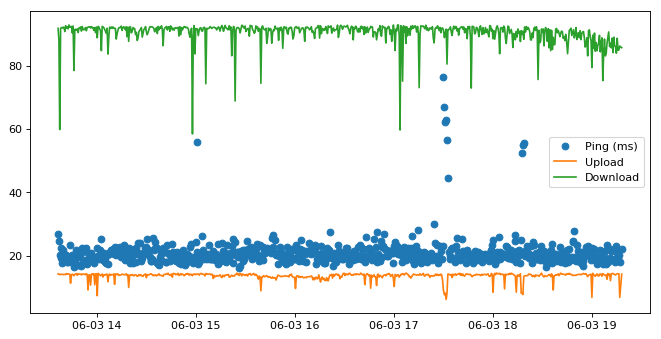

In [182]:
plt.figure(figsize=(10,5),dpi =80)

t = pd.to_datetime(df_clean['Time'])

plt.plot(t, df_clean['Ping (ms)'], 'o',label = 'Ping (ms)')    #'o' nariše pike
plt.plot(t, df_clean['Upload (Mbit/s)'], label= 'Upload')
plt.plot(t, df_clean['Download (Mbit/s)'], label = 'Download')

plt.legend()
plt.show()

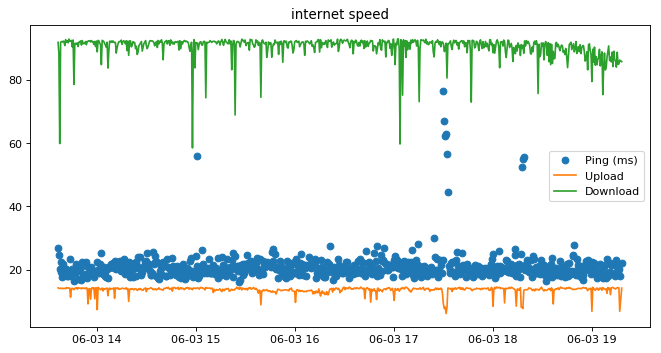

In [183]:
plt.figure(figsize=(10,5),dpi =80)

t = pd.to_datetime(df_clean['Time'])

plt.plot(t, df_clean['Ping (ms)'], 'o',label = 'Ping (ms)')    #'o' nariše pike
plt.plot(t, df_clean['Upload (Mbit/s)'], label= 'Upload')
plt.plot(t, df_clean['Download (Mbit/s)'], label = 'Download')

plt.title('internet speed')
plt.legend()
plt.show()

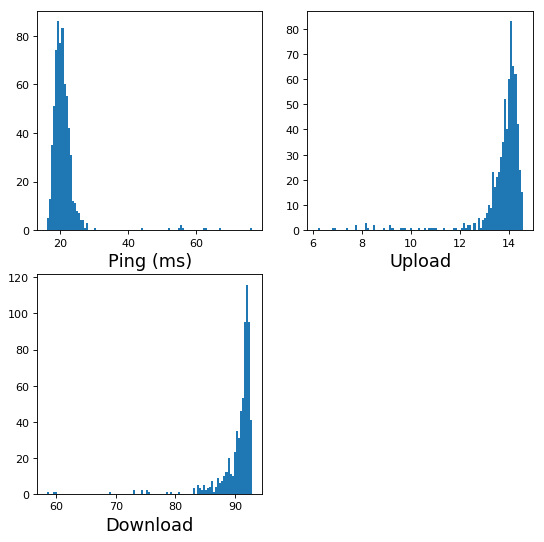

In [187]:
#histogrami
plt.figure(figsize=(8,8),dpi =80)
plt.subplot(2,2,1)
plt.hist(df_clean['Ping (ms)'], 100) # 100 - na koliko intervalov razdeli
plt.xlabel('Ping (ms)', fontsize = 16)
plt.tick_params(labelsize=10)

plt.subplot(2,2,2)
plt.hist(df_clean['Upload (Mbit/s)'], 100) # 100 - na koliko intervalov razdeli
plt.xlabel('Upload', fontsize = 16)
plt.tick_params(labelsize=10)

plt.subplot(2,2,3)
plt.hist(df_clean['Download (Mbit/s)'], 100) # 100 - na koliko intervalov razdeli
plt.xlabel('Download', fontsize = 16)
plt.tick_params(labelsize=10)

## Internet Meter Anomaly Detection 


**Create a Dataframe and modify the quantities**



In [ ]:
#interaktivni grafi
#narisali bomo 3D grad: ping/upload/download bodo osi

In [188]:
df_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


In [210]:
#preuredimo podatke
#ping pretvorimo, da bodo enote enakovredne
df_rates = df_clean.copy()
df_rates.drop(['Date', 'Time', 'Ping (ms)'], axis = 1, inplace = True)
lookup = {'Download (Mbit/s)': 'download_rate', 
          'Upload (Mbit/s)': 'upload_rate'}
df_rates.rename(columns = lookup, inplace = True)

ping_rate = 1./ df_clean['Ping (ms)'] #lahko tudi 1 / --> je isto 
ping_rate = 1000 * ping_rate
df_rates['ping_rate'] = ping_rate

In [202]:
df_rates.head()

,download_rate,upload_rate,ping rate
0,91.80,14.31,37.048014
1,88.19,14.12,40.763085
2,59.86,14.11,49.443758
3,91.81,14.22,51.727705
4,92.05,14.08,44.456299


**Vizualizacija podatkov**



In [194]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

In [195]:
def f(x):
    return x**2

In [197]:
interact(f, x= (0,100)) 
#prvi argument je funklcija, drugi je interval
#interaktivno izvaja funkcijo f za števila v intervalu

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [211]:
#narišemo graf
def scatter_view(x,y,z,azim,elev):
    fig = plt.figure(figsize=(8,8),dpi =80)
    ax = Axes3D(fig)
    ax.scatter(x,y,z)
    
    ax.set_xlabel('D rate (Mbit/s)', fontsize = 16)
    ax.set_ylabel('U rate (Mbit/s)', fontsize = 16)
    ax.set_zlabel('P rate (1/s)', fontsize = 16)
    
    ax.azim = azim
    ax.elev = elev

In [212]:
xi= df_rates['download_rate']
yi = df_rates['upload_rate']
zi = df_rates['ping_rate']

#dva drsnika bomo imeli: azim in elev
interact(lambda azim, elev: scatter_view(xi, yi, zi, azim, elev), azim=(0,90), elev = (0,90))
plt.show()

interactive(children=(IntSlider(value=45, description='azim', max=90), IntSlider(value=45, description='elev',…

In [ ]:
#datacamp: 
#dobra stran za učenje, precej tečajev je tudi brezplačnih
#vsbeuje veliko tutorialov

**Euclidean Anomaly Detection**
